<a href="https://colab.research.google.com/github/mariaeduardagimenes/NLP/blob/master/Tutorial_NLP_AEVO_SentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de sentimentos

## Introdução

Até agora, as análises que fizemos foram bem genéricas - observar contagens, criar gráficos, etc. Essas técnicas também podem ser aplicadas a dados numéricos. A diferença do NLP é exatamente que os dados são em formato de texto. 

Quando se trata de dados de texto, existem algumas técnicas populares que podem ser aplicadas, começando com a análise de sentimento. 

Alguns pontos-chave a serem lembrados com a análise de sentimento.

1. **TextBlob:** Os pesquisadores linguísticos rotularam o sentimento das palavras com base em sua experiência no domínio. O sentimento das palavras pode variar de acordo com a localização da frase. O módulo TextBlob nos permite tirar proveito dessas etiquetas. Entretando, o TextBlob só funciona para o idioma inglês, dificultando nosso uso em português. 

2. **Rótulos de sentimento:** Cada palavra em um corpus é rotulada em termos de polaridade e subjetividade (há mais rótulos também). O sentimento de um corpus é a média deles.

- Polaridade: quão positiva ou negativa é uma palavra. -1 é muito negativo. +1 é muito positivo.
- Subjetividade: quão subjetiva ou opinativa é uma palavra. 0 é um fato. 1 é muito mais uma opinião.


Vamos dar uma olhada no sentimento dos textos, utilizando textblob (tendo em vista que os textos possuem palavras em inglês) e usando o textblob traduzindo.

In [ ]:
# Começaremos lendo o corpus, que preserva a ordem das palavras
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,textos,full_name
inovacao aberta,Se você já acompanha nossos conteúdos há algum...,Inovação Aberta
inovacao incremental,O termo inovação incremental ganhou força em 1...,Inovação Incremental
intraempreendedorismo,"As soft skills são habilidades subjetivas, de ...",Intraempreendedorismo


**TextBlob só tem para inglês. Como o texto tem palavras em inglês, vamos textar essa abordagem**

**E vamos tentar também fazendo a tradução**

In [ ]:
# Crie funções lambda rápidas para encontrar a polaridade e subjetividade de cada rotina
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['textos'].apply(pol)
data['subjectivity'] = data['textos'].apply(sub)
data

,textos,full_name,polarity,subjectivity
inovacao aberta,Se você já acompanha nossos conteúdos há algum...,Inovação Aberta,-0.015572,0.534259
inovacao incremental,O termo inovação incremental ganhou força em 1...,Inovação Incremental,0.019531,0.450000
intraempreendedorismo,"As soft skills são habilidades subjetivas, de ...",Intraempreendedorismo,0.063068,0.406818


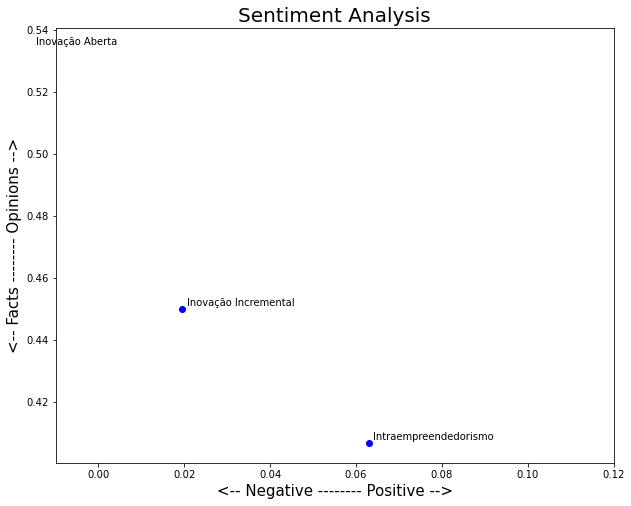

In [ ]:
# Plotar os resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, assunto in enumerate(data.index):
    x = data.polarity.loc[assunto]
    y = data.subjectivity.loc[assunto]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Aparentemente não ficou muito legal. Talvez pelo módulo TextBlob não funcionar em português.

**Traduzindo para o português**

In [ ]:
#Variável que irá armazenar as polaridades
analysis = None
# Lista vazia para armazenar as polaridades
polarities = []


In [ ]:
from googletrans import Translator
from unidecode import unidecode
from textblob import TextBlob as tb 
import numpy as np

In [ ]:
for texto in data['textos']: #para cada texto lido foi passar por unicode
    #Texto do blog
    textPT = unidecode(texto)
    
    #vou Traduzir para o Inglês
    textEN = Translator().translate(textPT)
    
    analysis = tb(textEN.text) #usar TextBlob    
    #Calculando a polaridade do texto traduzido
    polarity = analysis.sentiment.polarity #analisa a polaridade  
    polarities.append(polarity) #add polaridade de cada texto no vetor polaridades

In [ ]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [0.1435021584632983, 0.13143512590695688, 0.19068645640074222]


In [ ]:
print('A MÉDIA DE SENTIMENTO É: ' + str(np.mean(polarities)))

A MÉDIA DE SENTIMENTO É: 0.15520791359033248


In [ ]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive = positive+1
    elif polarity < 0:
        negative = negative+1
    else:
        neutral = neutral+1           

#calcula percentual
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

In [ ]:
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

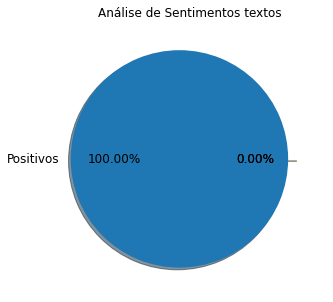

In [ ]:
explode = (0.1, 0, 0) #Separa o primeiro

pie_chart = pd.Series(percents, index=sentiments,name='')
pie_chart.plot.pie(fontsize=12, explode=explode, autopct='%.2f%%', shadow=True,
                   figsize=(5, 5),title="Análise de Sentimentos textos");

Nenhum texto ficou neutro nem negativo. Isso pode fazer sentido considerando que é um blog escrito por funcionários da empresa querendo transmitir mensagem positiva.

### Retornando

Em vez de examinar o sentimento geral, vamos ver se há algo interessante sobre o sentimento ao longo do tempo 



In [ ]:
# Divida em 10 partes
import numpy as np
import math

def split_text(text, n=10):
    '''Recebe uma string de texto e se divide em n partes iguais, com um padrão de 10 partes iguais.'''

    # Calcule o comprimento do texto, o tamanho de cada pedaço de texto e os pontos de partida de cada pedaço de texto
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Retire pedaços de texto do mesmo tamanho e coloque-os em uma lista
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
data

,textos,full_name,polarity,subjectivity
inovacao aberta,Se você já acompanha nossos conteúdos há algum...,Inovação Aberta,-0.015572,0.534259
inovacao incremental,O termo inovação incremental ganhou força em 1...,Inovação Incremental,0.019531,0.450000
intraempreendedorismo,"As soft skills são habilidades subjetivas, de ...",Intraempreendedorismo,0.063068,0.406818


In [ ]:
# Vamos criar uma lista para conter todos os pedaços de texto
list_pieces = []
for t in data.textos:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Se você já acompanha nossos conteúdos há algum tempo, sabe a importância do mindset de inovação aberta para construir não somente o agora, como também o futuro.\xa0 O nome dessa estratégia é Ambidestria Organizacional e ela tem ajudado grandes organizações a obterem visões mais profundas sobre a natureza do seu core business, alocação de recursos e projetos de curto e longo prazo. Entretanto, em alguns meses nosso cenário mudou, trazendo à tona preocupações que antes não tínhamos, como a urgência em sobreviver (hoje) – consequência direta das novas barreiras e adaptações que as empresas enfrentam para seguir em frente com as suas atividades, mesmo de forma remota e digital. Já existia, é claro, uma tendência mundial a digitalização de processos, mas ter que fazer isso “na marra”, certamente pegou muitas organizações de surpresa e é justamente sobre a adaptação frente a esse novo cenário que falaremos hoje. O objetivo desse artigo é compartilhar as melhores respostas da segunda ediçã

In [ ]:
# A lista possui 3 elementos, um para cada texto
len(list_pieces)

3

In [ ]:
# Cada transcrição foi dividida em 10 pedaços de texto
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_textos = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_textos.append(polarity_piece)
    
polarity_textos

[[0.03409090909090909,
  0.0,
  0.0,
  0.0,
  0.24166666666666664,
  0.35000000000000003,
  -0.26666666666666666,
  -0.8,
  0.0,
  0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.078125, 0.0, 0.0, 0.0, 0.0],
 [0.1,
  -0.09583333333333337,
  0.1,
  0.10000000000000002,
  0.1,
  0.1,
  0.07500000000000001,
  0.09166666666666667,
  0.1,
  0.1]]

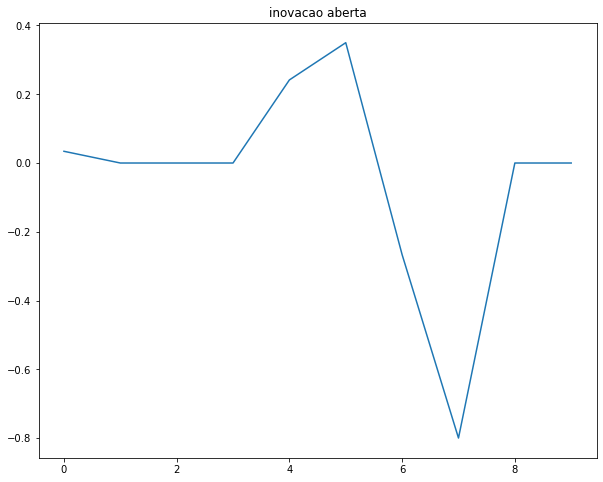

In [ ]:

# Mostre o enredo para um texto
plt.plot(polarity_textos[0])
plt.title(data['full_name'].index[0])
plt.show()

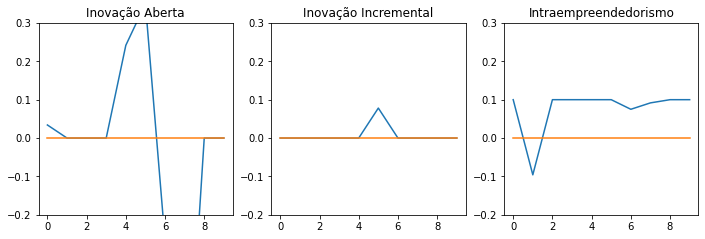

In [ ]:
# Gráfico para todos os textos
plt.rcParams['figure.figsize'] = [16, 12]

for index, assunto in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_textos[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()